# Kinds of kindness: budget creation
This notebook contains the algorithm to create the budget constraints.

In [1]:
import sys
sys.path.append('/Users/federicobassi/Desktop/TI.nosync/MPhil_Thesis/python/utils')
from utils.data_generation import *
from utils.data_plotting import *
from utils.test_rev_pref import *
from utils.maximize_utility_bc import *
from utils.budget_placement import *
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pickle
np.random.seed(123)

## Setup

### Paths

In [2]:
path = "/Users/federicobassi/Desktop/TI.nosync/MPhil_Thesis"
img_path = path+"/plots"
out = path + "/simulated_data"

### Parameters distributions

In [3]:
param_distribution_ces = {'alpha_ces': lambda: np.random.uniform(0.5, 1),
                              'rho_ces': lambda: np.random.uniform(-0.5, 0.95)}

### Budget constraints

In [48]:
andreoni_miller_budgets = [(120, 40), (40, 120), (120, 60), (60, 120), (150, 75),
                               (75, 150), (60, 60), (100, 100), (80, 80), (160, 40), (40, 160)]

budgets_2 = [(40,200), (40,160), (40,120), (40,100), (75,150), (70,100),(80,100), (60,60), (150,100), (150,75),(120,40), (160,40)]

#budgets_2 = [(80, 480), (80,400), (80,320), (40,120), (40,100), (75,150), (70,100),(80,100), (60,60), (150,100), (150,75),(120,40), (160,40)]

upward_sloping = [(10, 130), (20, 110), (40, 70), (70,40), (110,20), (130, 10)]

## Algorithms to find the new budget constraints

### Downward-sloping constraints: Approach 1

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': '12 new budget constraint - Algorithm 1'}, xlabel='self', ylabel='other'>)

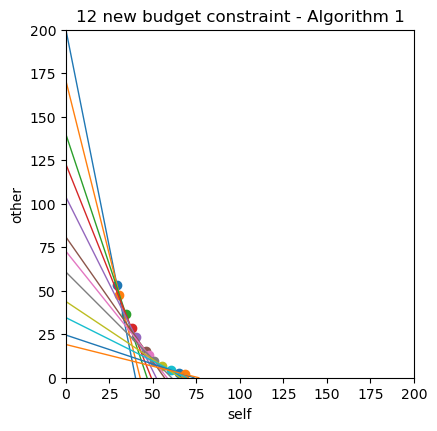

In [49]:
new_budgets_approach_1, opt_bundles = place_budgets(budgets_2, ces,                
    param_distribution_ces,   
    n_draws=500,
    optimiser = "exact",
    statistic = "median"
)

plot_budget_sequence(new_budgets_approach_1, 
                     opt_bundles, 
                     title= "12 new budget constraint - Algorithm 1",
                    save_path = img_path+"/11_new_bc_alg_1")

In [50]:
# Sanity check
# How many new budget sets found
print("I have found: "+ str(len(new_budgets_approach_1))+ " new budgets set. \n\nNew budget sets:")
print(new_budgets_approach_1)

with open(out+"/budget_constraints_alg1.pkl", "wb") as f:
    pickle.dump(new_budgets_approach_1, f)

# Prices in the new budget constraints and in AM constraints
print("\nPrices in the new budgets")
nb = [round(new_budgets_approach_1[i][0]/new_budgets_approach_1[i][1],2) for i in range(len(new_budgets_approach_1))]
nb.sort()
print(nb)
print("\nPrices in the AM budgets")
am = [round(andreoni_miller_budgets[i][0]/andreoni_miller_budgets[i][1],2) for i in range(len(andreoni_miller_budgets))]
am.sort()
print(am)

I have found: 12 new budgets set. 

New budget sets:
[(40, 200), (42.66980708675091, 170.67922834700363), (46.64030713194319, 139.92092139582957), (49.08215670666855, 122.70539176667137), (51.926839791931826, 103.85367958386365), (56.61217334403594, 80.87453334862278), (58.13833121270014, 72.67291401587516), (60.751664235830646, 60.751664235830646), (65.69775831954854, 43.79850554636569), (69.09450938498401, 34.547254692492004), (73.56841169111749, 24.52280389703916), (76.35770047080412, 19.08942511770103)]

Prices in the new budgets
[0.2, 0.25, 0.33, 0.4, 0.5, 0.7, 0.8, 1.0, 1.5, 2.0, 3.0, 4.0]

Prices in the AM budgets
[0.25, 0.33, 0.5, 0.5, 1.0, 1.0, 1.0, 2.0, 2.0, 3.0, 4.0]


### Downward-sloping constraints: Approach 2

In [66]:
new_budgets_approach_2, optima, noisy_optima = place_budgets_garp_with_noise(
    template        = budgets_2,
    utility_fn      = ces,
    param_sampler   = param_distribution_ces,
    n_draws         = 1000,         
    maximiser       = "exact",     
    noise_std       = 10   
)

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': '12 new budget constraint (Algorithm 2)'}, xlabel='self', ylabel='other'>)

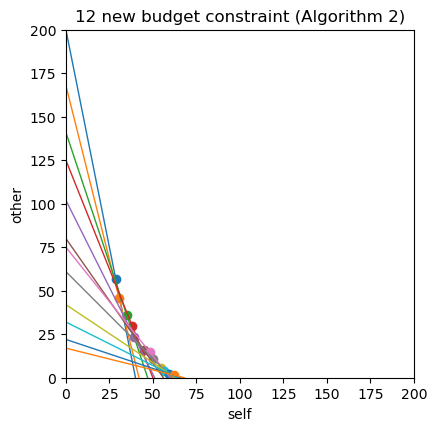

In [67]:
rep_points = [df[["opt_x", "opt_y"]].median().to_numpy() for df in noisy_optima]
plot_budget_sequence(new_budgets_approach_2, 
                     rep_points, 
                     title= "12 new budget constraint (Algorithm 2)", 
                     save_path = img_path+"/11_new_bc_alg_2")

In [68]:
# Sanity check
# How many new budget sets found
print("I have found: "+ str(len(new_budgets_approach_2))+ " new budgets set. \n\nNew budget sets:")
print(new_budgets_approach_2)

# Save
with open(out+"/budget_constraints_alg2.pkl", "wb") as f:
    pickle.dump(new_budgets_approach_2, f)

# Prices in the new budget constraints and in AM constraints
print("\nPrices in the new budgets")
nb = [round(new_budgets_approach_2[i][0]/new_budgets_approach_2[i][1],2) for i in range(len(new_budgets_approach_2))]
print(nb)
print("\nPrices in the AM budgets")
am = [round(andreoni_miller_budgets[i][0]/andreoni_miller_budgets[i][1],2) for i in range(len(andreoni_miller_budgets))]
am.sort()
print(am)

I have found: 12 new budgets set. 

New budget sets:
[(40, 200), (42, 168), (47, 141), (50, 125), (51, 102), (56, 80), (60, 75), (61, 61), (63, 42), (64, 32), (66, 22), (68, 17)]

Prices in the new budgets
[0.2, 0.25, 0.33, 0.4, 0.5, 0.7, 0.8, 1.0, 1.5, 2.0, 3.0, 4.0]

Prices in the AM budgets
[0.25, 0.33, 0.5, 0.5, 1.0, 1.0, 1.0, 2.0, 2.0, 3.0, 4.0]
